CPSC_483 - Intro to Machine Learning [Final Project]

face_emotion_recognition_vers_2

- Step 1 : Prepping and Formatting Data


In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random


img_array = cv2.imread("totrain/0/PrivateTest_10131363.jpg")

#img_array.shape --> (48, 48, 3)

#since image is in 48 x 48 it needs to be in 224 x 224 to fit the model input format

img_size = 224
#new_array = cv2.resize(img_array, (img_size,img_size))
#plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
#plt.show()

dir = "totrain/"
Expressions = ["0", "1", "2", "3", "4", "5", "6"]

data = []

def create_training_expression():
    for emotion in Expressions:
        path = os.path.join(dir, emotion)                                       #path for emotion
        label = Expressions.index(emotion)                                      #grabbing the label for the emotion
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))                  #read the images
                new_array = cv2.resize(img_array, (img_size, img_size))         #convert images into size 224
                data.append([new_array, label])                                 #append 224 x 224 images and their respective label into data
            except Exception as e:
                pass

create_training_expression()
random.shuffle(data)                                                            #randomize the data



In [ ]:
print(len(data))

7178


In [ ]:
print(data[0][0].shape)

(224, 224, 3)


In [ ]:
x, y = [], []

for features, label in data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)                             #converting "x" aka feature aka the images to 4 dimension

#normalizing the data
x = x/255.0;

y = np.array(y)                                                                #from list nparray


- Step 2 : Loading Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.applications.MobileNetV2()                                     #pre-trained model
base_input = model.layers[0].input
base_output = model.layers[-2].output


#we only have 7 expressions/emotions to  be outputted so we have to modify the model accordingly ; feature size manipulation

final_output = layers.Dense(128)(base_output)                                                        #layering each unit will allow for a better ability or capacity to generalize new data. this is because each layer learns difference features and abstraction
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(base_output)
final_output = layers.Activation('relu')(final_output)                                               #ReLU introduces non-linearity into the network, allowing it to learn complex patterns in the data.
final_output = layers.Dense(7,activation='softmax')(final_output)                                    #Softmax function outputs values between 0 and 1, and the sum of all probabilities is equal to 1, making it suitable for classification problems.


modified_model = keras.Model(inputs = base_input, outputs = final_output)

#configuring the training process
#the loss function is use for multiclass classification problems for integers labels
#optimizer adam is an adaptive learning rate algo. It adapts the learning rate base on past gradients, allowing for faster convergence
#metric is used to evaluate the performance of the model

modified_model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])
modified_model.fit(x,y, epochs=30)



14536120/14536120 [==============================] - 0s 0us/step
Epoch 1/30
225/225 [==============================] - 47s 85ms/step - loss: 1.4178 - accuracy: 0.4609
Epoch 2/30
225/225 [==============================] - 17s 77ms/step - loss: 1.1924 - accuracy: 0.5444
Epoch 3/30
225/225 [==============================] - 17s 76ms/step - loss: 1.0882 - accuracy: 0.5933
Epoch 4/30
225/225 [==============================] - 17s 77ms/step - loss: 1.0049 - accuracy: 0.6244
Epoch 5/30
225/225 [==============================] - 17s 77ms/step - loss: 0.9274 - accuracy: 0.6605
Epoch 6/30
225/225 [==============================] - 17s 77ms/step - loss: 0.8385 - accuracy: 0.6945
Epoch 7/30
225/225 [==============================] - 17s 77ms/step - loss: 0.7762 - accuracy: 0.7157
Epoch 8/30
225/225 [==============================] - 17s 77ms/step - loss: 0.7020 - accuracy: 0.7389
Epoch 9/30
225/225 [==============================] - 17s 77ms/step - loss: 0.6043 - accuracy: 0.7836
Epoch 10/30
225/2

In [ ]:
modified_model.save('cpsc483_ep30v2_95.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
modified_model = tf.keras.models.load_model('cpsc483_ep30_95.h5')

In [ ]:
frame = cv2.imread("test6.jpg")

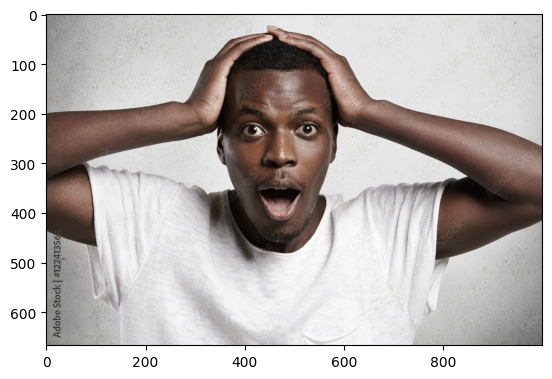

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
  face= faceCascade.detectMultiScale(roi_gray)
  if len(face) ==0:
    print("Face not detected")
  else:
    for (ex, ey, ew, eh) in face:
      face_roi = roi_color[ey: ey+eh, ex:ex +ew]

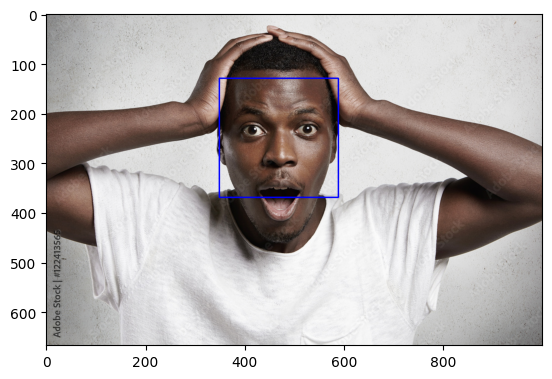

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

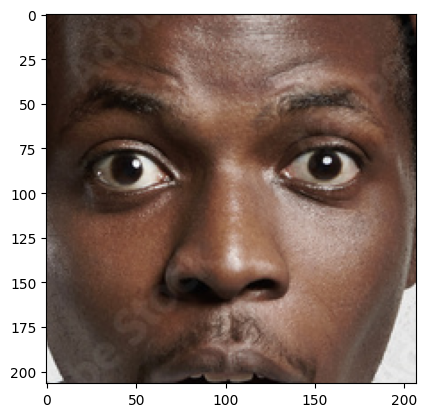

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/225.0


In [ ]:
final_image.shape

(1, 224, 224, 3)

In [ ]:
Predictions = modified_model.predict(final_image)

1/1 [==============================] - 0s 28ms/step


In [ ]:
print(Predictions)

[[1.0059447e-07 1.0201026e-09 4.6104775e-04 8.0023540e-07 2.0697544e-06
  2.4953815e-06 9.9953353e-01]]


In [ ]:
np.argmax(Predictions)